In [1]:
import sklearn
sklearn.__version__


'1.6.dev0'

init
-1.9384642815961473
k: 300
-1.8925930683589685
k: 301
-1.796571955202133
k: 302
-1.7468900650574763
k: 303
-1.7158477253156885
k: 304
-1.7080156177336407
k: 305
-1.6956950156512207
k: 306
-1.6574280194740276
k: 307
-1.6342180779792852
k: 308
-1.6313028662819289
k: 309
-1.602711325194928
k: 310
-1.582690805983138
k: 311
-1.559801571356164
k: 312
-1.4689392559350383
k: 313
-1.4449217397359633
k: 314
-1.4354756410313536
k: 315
-1.4246887168697913
k: 316
-1.4160364175173366
k: 317
-1.4037374529824143
k: 318
-1.3856288443635751
k: 319
-1.3400796076948125
k: 320
-1.3108322687575424
k: 321
-1.2862104429553054
k: 322
-1.2702737121746654
k: 323
-1.2633620114027875
k: 324
-1.24662054571523
k: 325
-1.241948244422411
k: 326
-1.2264164936392108
k: 327
-1.2023938640506886
k: 328
-1.1770398194975549
k: 329
-1.1730331300287087
k: 330
-1.1653169440751914
k: 331
-1.151613057738694
k: 332
-1.1388303428489797
k: 333
-1.1293755486937864
k: 334
-1.1272580700356725
k: 335
-1.1064159396549114
k: 336
-1.0

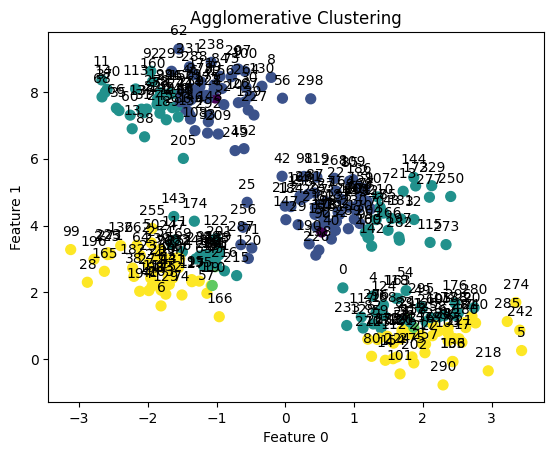

In [2]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.neighbors import kneighbors_graph


distance_threshold_new = 3.0
size_threshold_dict = {3:3, 21:4}

# Generate synthetic data
X, labels_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Create connectivity matrix
connectivity_matrix = kneighbors_graph(X, n_neighbors=300, include_self=True)
# print(connectivity_matrix)

# Print the connectivity matrix
# print(connectivity_matrix)

# Initialize the Agglomerative Clustering model
model = AgglomerativeClustering(n_clusters=10, connectivity=connectivity_matrix, metric='cosine',
                                 linkage='average', distance_threshold_new=distance_threshold_new, 
                                 size_threshold_dict= size_threshold_dict)

# Fit model to the data
model.fit(X)

# Predict the cluster labels
labels = model.labels_

#  Convert these labels into dict of clusters
clusters = {}
for i, label in enumerate(labels):
    if label in clusters:
        clusters[label].append(i)
    else:
        clusters[label] = [i]
print(clusters)


# Plot the clusters
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.title("Agglomerative Clustering")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# Show labels
for i, txt in enumerate(labels):
    plt.annotate(i, (X[i, 0], X[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

In [5]:
len(clusters)

6